In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [34]:
metric_file_name = 'Optimizer/Scale15/100-500-ctc2/metric_train_by_15_after_trained.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

In [35]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,15:14:21,15:14:2,206.93750,101.663091,1,1.1,11.5,84.0,15.7,...,105597.6,832740.0,0.0,342392.8,100.0,251.6,251.6,259.4,251.6,259.4
1,192.168.0.6,15:14:31,15:14:3,81.50210,72.139700,1,1.0,9.0,86.3,13.3,...,105711.6,835765.6,0.0,342453.6,100.0,259.4,259.4,259.8,259.4,259.9
2,192.168.0.6,15:14:40,15:14:4,248.86180,167.447429,1,1.4,11.0,83.3,16.6,...,105757.2,835786.0,0.0,342428.0,100.0,344.2,344.2,364.3,343.7,363.9
3,192.168.0.6,15:14:51,15:14:5,401.09940,274.288385,1,3.9,19.5,69.9,30.0,...,105816.0,835932.0,0.0,342408.0,100.0,919.2,919.2,1035.8,919.2,1035.8
4,192.168.0.6,15:15:00,15:15:0,82.36885,70.255830,1,9.4,39.5,33.7,66.2,...,105877.2,838312.8,0.0,342382.8,100.0,2312.4,2312.4,2560.5,2312.4,2560.6


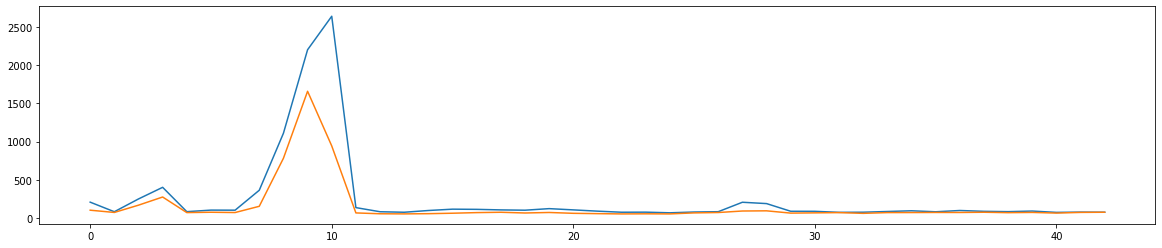

In [36]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

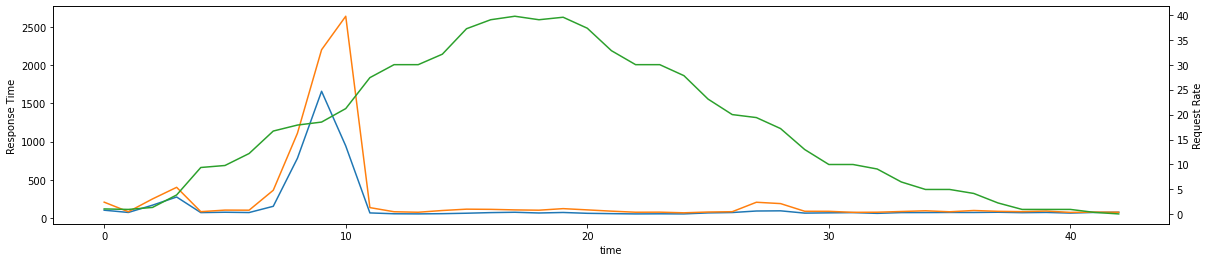

In [37]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

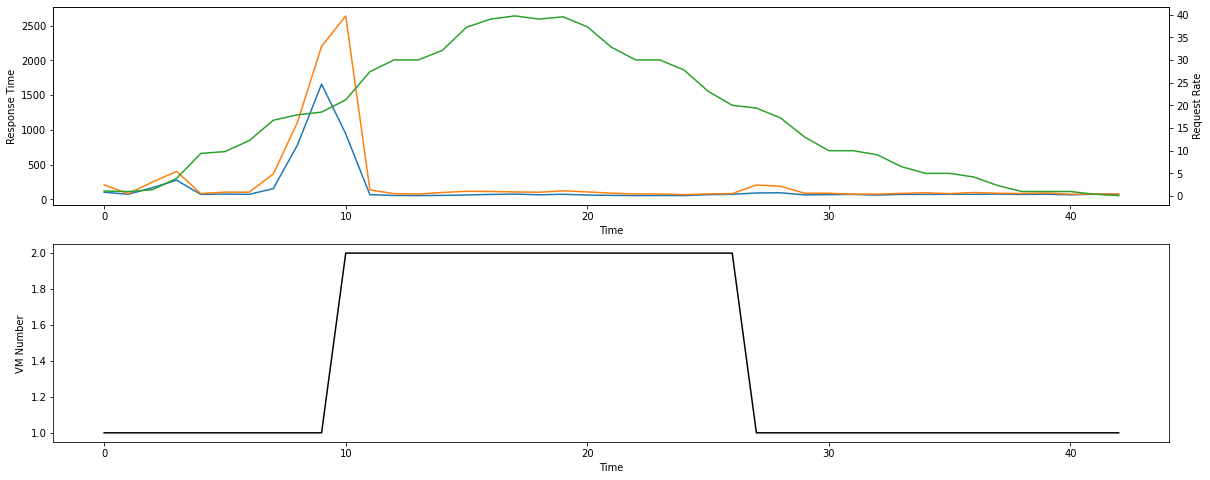

In [38]:
def wrt():
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(df['response_time'], color = 'C0')
    ax1.plot(df['response_time_p95'], color = 'C1')

    ax2 = ax1.twinx()

    ax2.plot(df['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

wrt()

In [7]:
df.iloc[:, 0:5].describe()

,response_time_p95,response_time
count,43.000000,43.000000
mean,246.914800,151.505720
std,516.148842,291.488931
min,67.559900,52.936953
25%,81.170950,63.730896
50%,90.285750,70.874040
75%,118.584850,74.826196
max,2640.914600,1658.638946


In [8]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs'],
      dtype='object')

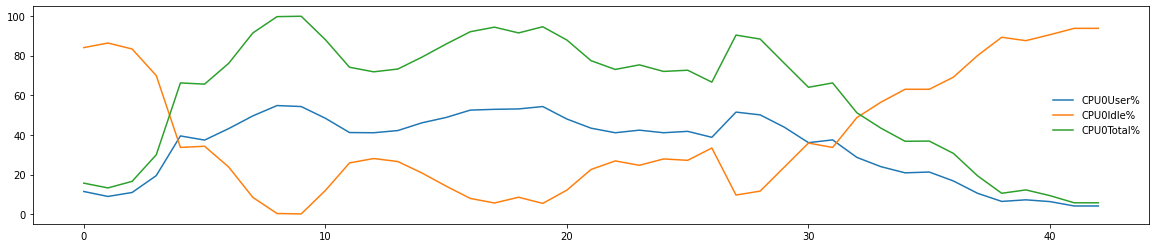

In [9]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label=col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [18]:
metric_file_name_one = 'Optimizer/Scale15/100-500-ctc1/metric_train_by_15_after_trained.log'
metric_file_name_bad = 'Optimizer/Scale15/incorrect_100-500/metric_train_by_15_after_trained.log'

# a response timeossal kell majd összasonlítanom

# cpu_log
# rt_log
#

In [19]:
# df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)
# df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

df_one = pd.read_csv(metric_file_name_one, sep=',', header=0)
df_bad = pd.read_csv(metric_file_name_bad, sep=',', header=0)

In [20]:
# print(df_cpu.count()[0])
# print(df_rt.count()[0])

print(df_one.count()[0])
print(df_bad.count()[0])

43
44


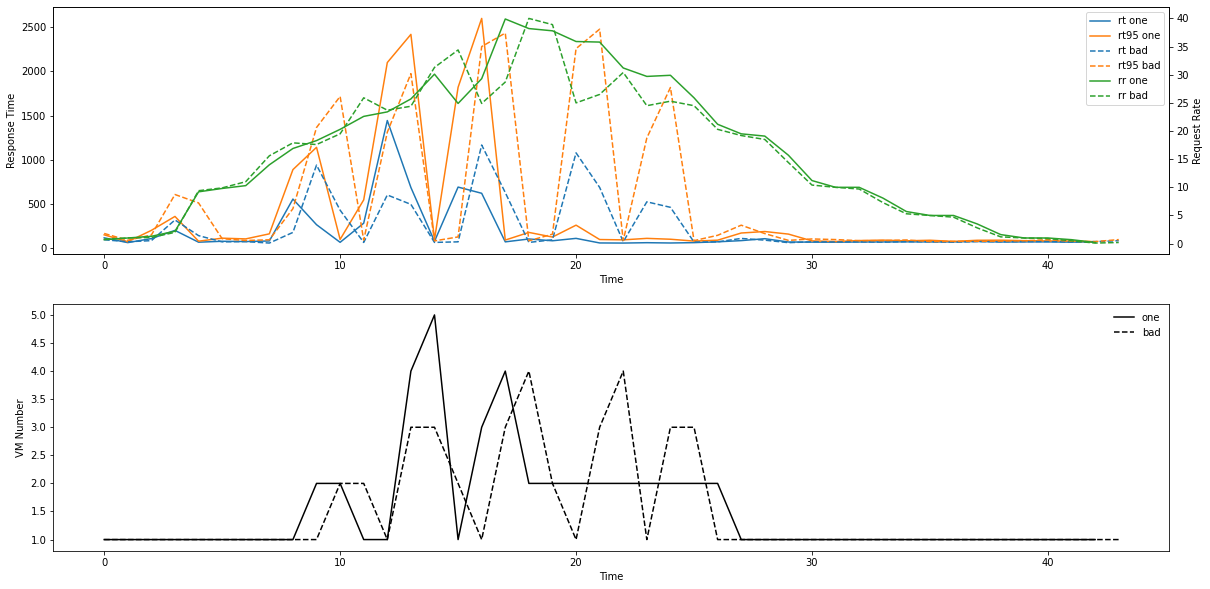

In [21]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_one['response_time'], color = 'C0', label = 'rt one')
lns2 = ax1.plot(df_one['response_time_p95'], color = 'C1', label = 'rt95 one')
lns3 = ax1.plot(df_bad['response_time'], color = 'C0', linestyle = 'dashed', label = 'rt bad')
lns4 = ax1.plot(df_bad['response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 bad')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_one['request_rate'], color = 'C2', label = 'rr one')
lns6 = ax2.plot(df_bad['request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr bad')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_one['worker_number'], color = 'black', label = 'one')
ax3.plot(df_bad['worker_number'], color = 'black', linestyle = 'dashed', label = 'bad')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

## Melyik időpontban mit mondott volna

Egyébként ez meg lehetett volna csinálni úgy is hogy a scale alatt kiirom filébe és onnan olvasom be.

Vagy úgy ahogy most csinálom, hogy gyorsan reprodukálom.

In [23]:
import scale_by_train15 as scbt

from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

from scale_by_train15 import load_tf_model

In [24]:
trained_metric_file_name = scbt.trained_metric_file_name

input_variables = scbt.input_variables

trained_folder = scbt.trained_folder

In [25]:
last_df = read_trained_csv(trained_metric_file_name)

train_features = get_train_features(last_df, input_variables)

current_worker_number = get_current_worker_number(last_df)

get_last_df_info(last_df)

model = load_tf_model(trained_folder)

predicted_labels = scbt.pred_rt(model, train_features)
print(predicted_labels)

aps = scbt.get_advice(w = current_worker_number, train_features = train_features, model = model, scale = 'OUT')

chosen_delta_vm = scbt.chose_action(aps, scale = 'OUT')


     request_rate  CPU0User%  [TCPD]OutSegs
223           0.3        6.4            3.0
wcsv -> 	223    21:01:54
Name: write_to_csv_time, dtype: object
tper -> 	223    21:01:5
Name: time, dtype: object
c_rt -> 	223    419.907333
Name: response_time, dtype: float64


2023-05-17 16:01:38.414496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-17 16:01:38.414555: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-17 16:01:38.414576: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lb): /proc/driver/nvidia/version does not exist
2023-05-17 16:01:38.414992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 120ms/step
[[84.17613]]
1 9
[1, 2, 3, 4]
---------------------------------------
train_features -> azaz current metrics 
     request_rate  CPU0User%  [TCPD]OutSegs
223           0.3        6.4            3.0
---------------------------------------
train_features ...... [0.3 6.4 3. ]
0 request_rate
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr/
[1.02434361 1.15767578] 0.17655714460201644
feature: 0.3 w: 5 a: 1
1 CPU0User%
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr/
[0.87016971 0.58266153] 1.8585627908563147
feature: 6.4 w: 5 a: 1
2 [TCPD]OutSegs
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr/
[0.88660233 0.42923089] 96.45658156530976
feature: 3.0 w: 5 a: 1
[[ 0.49  7.12 98.89]]
action =  1  --> rt -->  [[81.55]] 

0 request_rate
----------------------- pickle folder /home/ubuntu/Scaler/Train/Train15/lr/
[1.02434361 1.15767578] 0.17655714460201644
feature: 0

In [26]:
from IPython.display import clear_output
from rich.progress import track
# https://rich.readthedocs.io/en/stable/progress.html

In [27]:

# Ez kurva jó

# Ez alapján már ki tudom számolni, hogy mikor mit skálázott és advicolt minden egyes pontra (s ez alapján [..])

# --

# Tehát van a beolvasott scaler adatom

# df = df_one.copy()

rts = []
apss = []
chosen_delta_vms = []

for i in range(len(df)):
# for i in range(10):
    
    clear_output(wait=True)
    
    print(' i ', i)

    last_df = df.iloc[[i]]

    train_features = get_train_features(last_df, input_variables)
    current_worker_number = get_current_worker_number(last_df)
    # get_last_df_info(last_df)
    model = load_tf_model(trained_folder)
    predicted_labels = scbt.pred_rt(model, train_features)
    
    rt = last_df['response_time'].values[0]
    
    if rt > scbt.RT_LIMIT_UPPER:
        aps = scbt.get_advice(w = current_worker_number, train_features = train_features, model = model, scale = 'OUT')
        chosen_delta_vm = scbt.chose_action(aps, scale = 'OUT')

    if rt < scbt.RT_LIMIT_LOWER:
        aps = scbt.get_advice(w = current_worker_number, train_features = train_features, model = model, scale = 'IN')
        chosen_delta_vm = scbt.chose_action(aps, scale = 'IN')

    apss.append(aps)
    chosen_delta_vms.append(chosen_delta_vm)


 i  42
    request_rate  CPU0User%  [TCPD]OutSegs
42           0.1        4.2           27.8
1/1 [==============================] - 0s 59ms/step
1 9
[]
---------------------------------------
train_features -> azaz current metrics 
    request_rate  CPU0User%  [TCPD]OutSegs
42           0.1        4.2           27.8
---------------------------------------
train_features ...... [ 0.1  4.2 27.8]
---------------------------------------
RT_LIMIT_UPPER  500
RT_LIMIT_LOWER  100
---------------------------------------
SCALE IN
---------------------------------------
0
0
0
---------------------------------------


In [28]:
# chosen_delta_vms

In [29]:
df_one = df.copy()

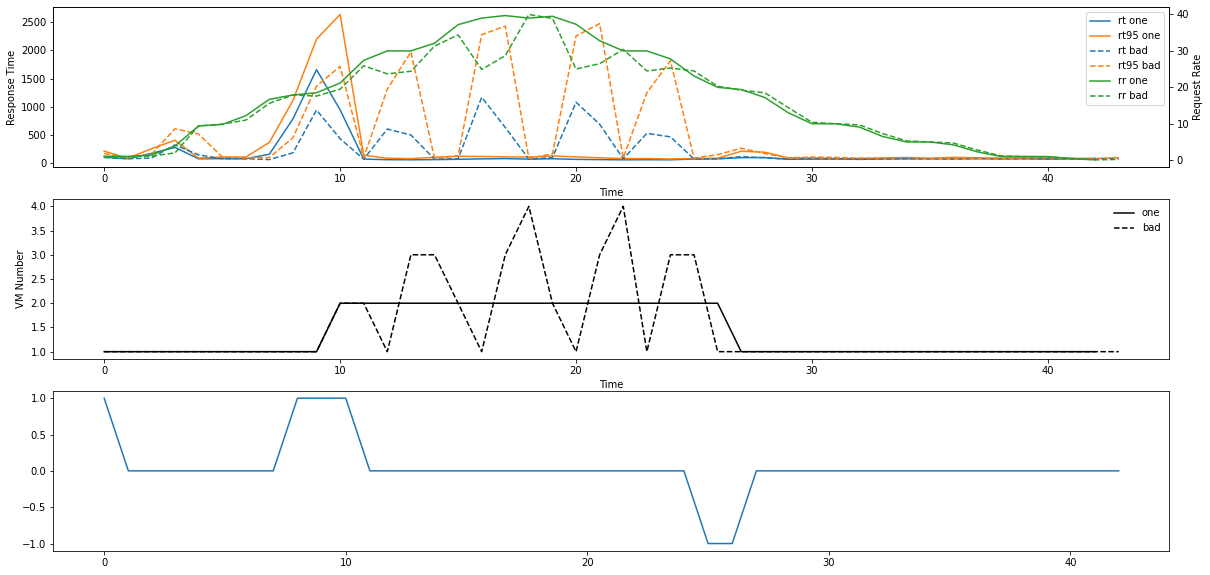

In [30]:
# Nézzük össze azt az eredményt amit így kaptam a eredeti filébe írt tényleges skálázási értékekkel

fig, (ax1, ax3, ax4) = plt.subplots(3, 1, figsize=(20, 10))

lns1 = ax1.plot(df_one['response_time'], color = 'C0', label = 'rt one')
lns2 = ax1.plot(df_one['response_time_p95'], color = 'C1', label = 'rt95 one')
lns3 = ax1.plot(df_bad['response_time'], color = 'C0', linestyle = 'dashed', label = 'rt bad')
lns4 = ax1.plot(df_bad['response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 bad')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_one['request_rate'], color = 'C2', label = 'rr one')
lns6 = ax2.plot(df_bad['request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr bad')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_one['worker_number'], color = 'black', label = 'one')
ax3.plot(df_bad['worker_number'], color = 'black', linestyle = 'dashed', label = 'bad')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

ax4.plot(chosen_delta_vms)

plt.show()

In [31]:
# Az nagyon jól látszik, hogy változott meg a skálázás annak hatására hogy (2x) kell mérnie mielőtt
# ténylegesen dönt.

# Úgy látszik, hogy erre tényleg szükség van, hogy az új, vagy az elvolnt gép hatása szétterüljön a
# virtuális gépek között.

In [56]:
# Fent egy fontos megjegyzsé magamnak.

# Vigyázni kell ezzel az ábrával.

# Igy útolag javaslatok alapján nem egészen azt adja mint ténylegesen (de miért?)

# Az okát még nem értem de talán a scale programomban van hiba (hogy hol mikor kérek el, számitok ki mit)

# A javaslat utolag hasonló mint ami ténylegesen volt, de vannak eltérések.

# Például rögtön az elején a [8] és a [9] lépésben is hozzáadaott egyett - javaslat szintjén - akkor már 3
# darab vm-nek kéne lennie de csak kettő van a mérésben. A többi viszont jónak tűnik.

print(chosen_delta_vms)

[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Clip

Clip test.

In [40]:
metric_file_name = 'Optimizer/Scale15/100-500-ctc1-clip/metric_train_by_15_after_trained.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,18:41:30,18:41:3,242.80165,154.469765,1,3.4,10.9,79.7,20.2,...,107568.0,861500.0,0.0,351651.2,100.0,718.2,718.2,873.8,718.2,873.8
1,192.168.0.6,18:41:40,18:41:4,208.42105,89.609776,1,9.8,31.6,42.4,57.6,...,107587.2,864555.6,0.0,351660.4,100.0,2096.1,2096.1,2512.0,2095.6,2511.6
2,192.168.0.6,18:41:50,18:41:5,226.62320,98.192902,1,12.3,39.5,31.1,68.8,...,107620.0,865574.0,0.0,351651.2,100.0,2392.5,2392.5,3154.4,2392.5,3154.5
3,192.168.0.6,18:42:02,18:42:0,2295.50020,1550.687474,1,23.2,56.3,0.2,99.8,...,107624.0,865470.8,0.0,351660.4,100.0,2806.3,2806.3,5492.2,2806.3,5492.7
4,192.168.0.6,18:42:10,18:42:1,2489.71380,633.485528,3,28.4,46.6,17.6,82.4,...,107653.6,866988.4,0.0,351787.2,100.0,2375.2,2375.2,4104.5,2375.2,4105.1


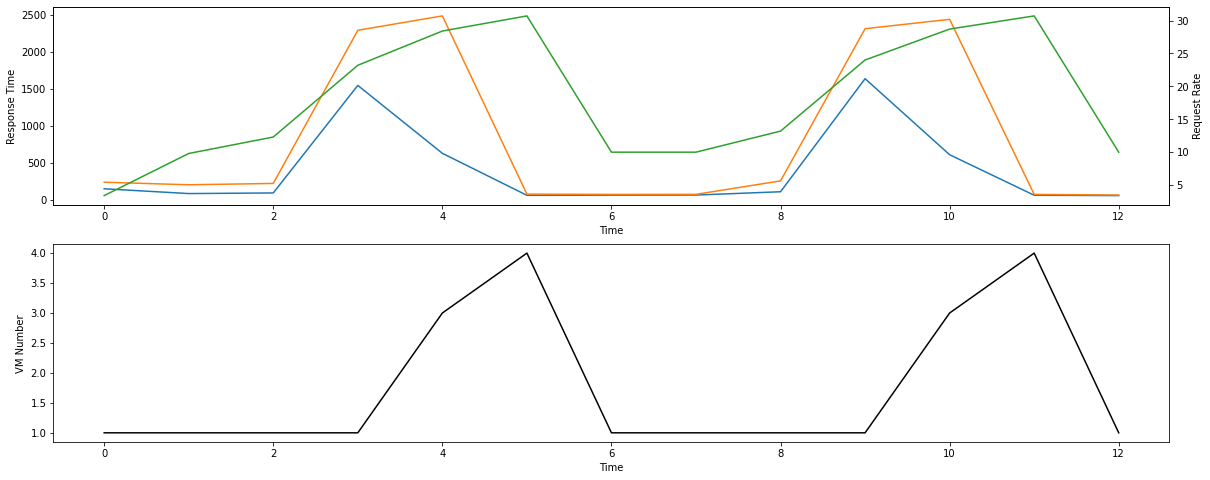

In [41]:
wrt()

# Clip Hard

Clip test.

In [42]:
metric_file_name = 'Optimizer/Scale15/100-500-ctc1-clip-hard/metric_train_by_15_after_trained.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,18:53:51,18:53:5,671.88460,458.339108,1,6.5,22.7,60.6,39.3,...,108519.2,866154.4,0.0,352343.6,100.0,1324.1,1324.1,1985.6,1324.1,1985.6
1,192.168.0.6,18:54:01,18:54:0,799.70190,486.898085,1,19.9,59.3,0.6,99.4,...,108993.6,870592.8,0.0,352471.6,100.0,2587.6,2587.6,5086.3,2587.0,5085.8
2,192.168.0.6,18:54:12,18:54:1,1831.66170,921.475086,1,23.2,54.4,0.5,99.5,...,108088.0,867580.8,0.0,352509.6,100.0,3008.1,3008.1,5887.0,3008.1,5887.3
3,192.168.0.6,18:54:20,18:54:2,2130.04230,641.757062,4,57.8,56.9,0.3,99.7,...,108131.6,870632.8,0.0,352510.0,100.0,3108.7,3108.7,5617.4,3108.7,5617.6
4,192.168.0.6,18:54:30,18:54:3,556.97075,374.540709,5,102.8,55.1,0.6,99.4,...,108158.8,871346.4,0.0,352505.2,100.0,2671.4,2671.4,5575.1,2671.4,5575.2


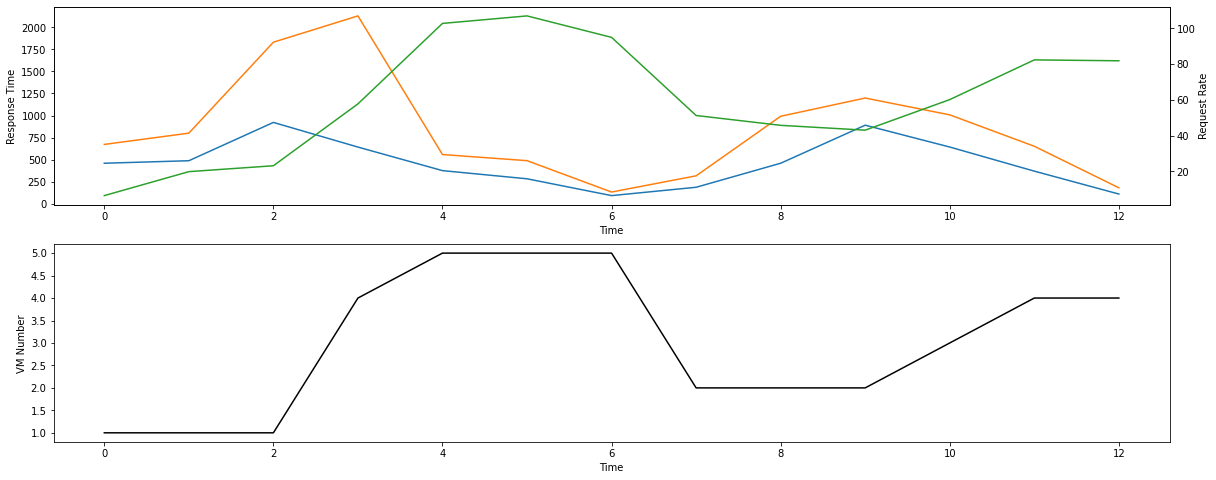

In [43]:
wrt()

# Banyek

Az van, hogy itt 10 másodperces mintavételezés van ami nem rossz, és rendszer is jól müködik,
de sokkal pontosabb összehasonlítást tudnék véghez vinni, ha a JMeterből kiexportált adatokat
válaszidőket hasonlítanám össze.

Mert fent ugye a 10 másodpercre vett átlagok vannak. Ami jó a skálázásnál, de jobb lenne ha [.]

In [87]:
jmfile = 'Optimizer/Scale15/100-500-ctc1-clip-hard/adviser_015_100-500-ctc1-clip-hard.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = scbt.RT_LIMIT_UPPER
jf['RT_LIMIT_LOWER'] = scbt.RT_LIMIT_LOWER

jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684349627142,524,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-9,text,True,NaN,337,133,10,10,http://193.225.250.30/io/1/dir_path/250,524,0,7,500,100
1,1684349627135,531,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-5,text,True,NaN,337,133,10,10,http://193.225.250.30/io/1/dir_path/250,531,0,4,500,100


In [88]:
jf.columns

Index(['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage',
       'threadName', 'dataType', 'success', 'failureMessage', 'bytes',
       'sentBytes', 'grpThreads', 'allThreads', 'URL', 'Latency', 'IdleTime',
       'Connect', 'RT_LIMIT_UPPER', 'RT_LIMIT_LOWER'],
      dtype='object')

In [89]:
jf['ma10rt'] = jf['Latency'].rolling(3).mean()

## Ez az ábrázolás itt roszz

Tegnap azon dolgoztam, hogy ezt kijavítsam

Az eredmény lent a notebook végén.

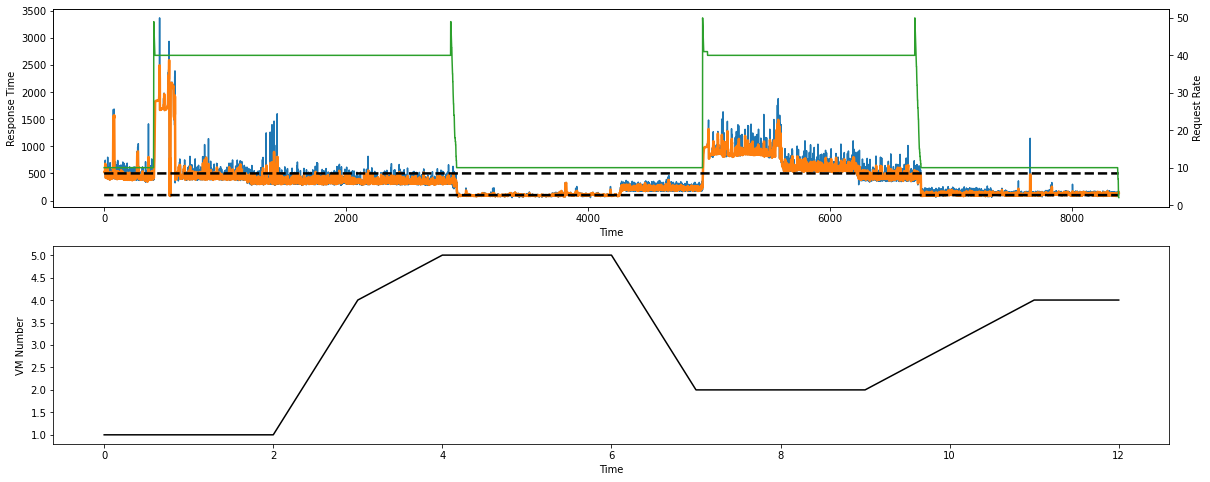

In [90]:
def jmf():
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(jf['Latency'], color = 'C0')
    
    ax1.plot(jf['ma10rt'], color = 'C1', lw = 2.5)
    
    ax1.plot(jf['RT_LIMIT_LOWER'], color = 'black', lw = 2.5, ls = '--')
    ax1.plot(jf['RT_LIMIT_UPPER'], color = 'black', lw = 2.5, ls = '--')
    

    ax2 = ax1.twinx()

    ax2.plot(jf['allThreads'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

jmf()

In [101]:
jf = jf.astype({'timeStamp':'int'})

In [109]:
import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot


jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))


jf.head(2)

2023-05-17 18:53:47


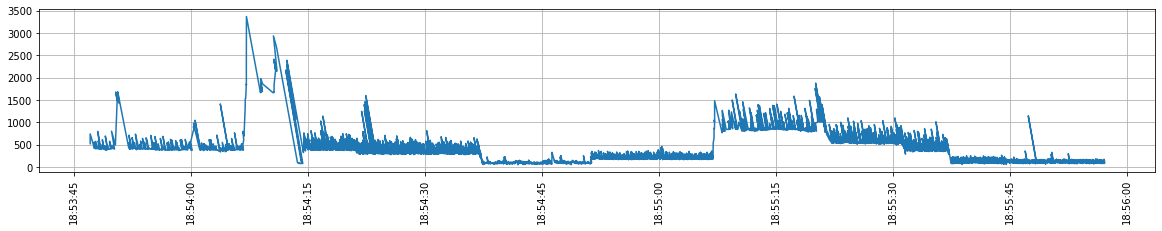

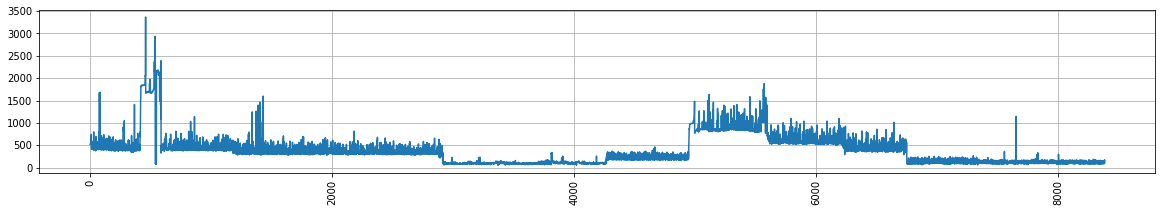

In [118]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')


plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

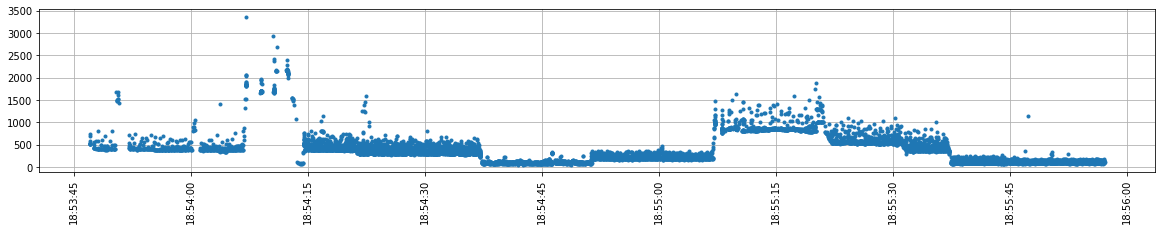

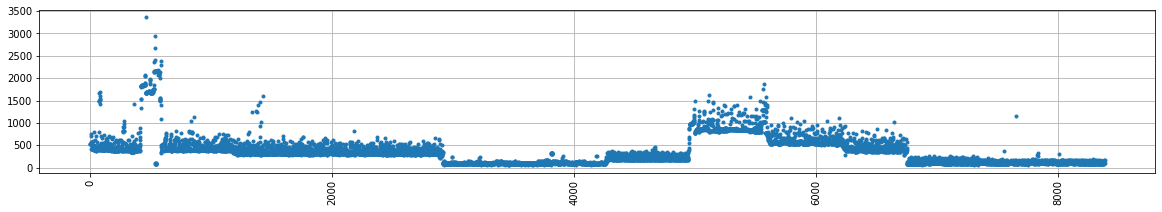

In [128]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')


plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

In [123]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

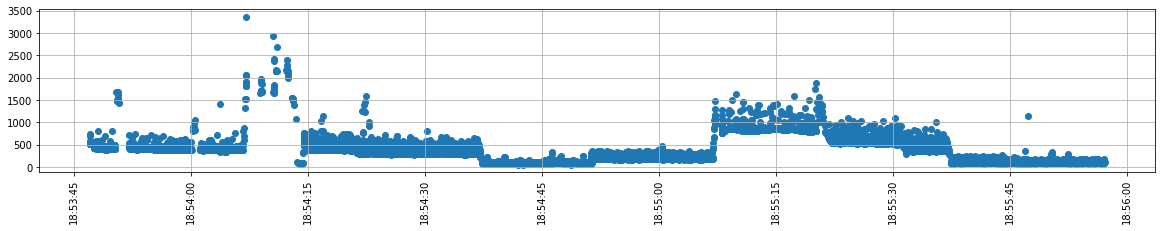

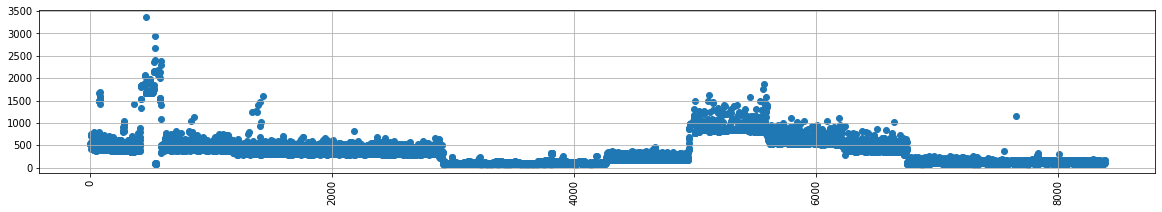

In [125]:
plt.figure(figsize=(20, 3))
plt.scatter(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')


plt.figure(figsize=(20, 3))
plt.scatter(jf['_x'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

In [129]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


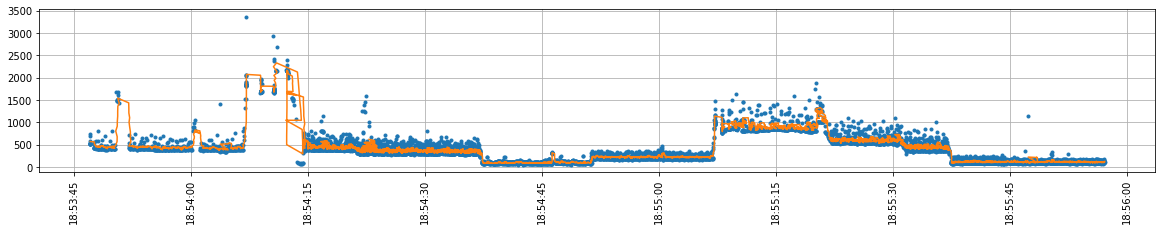

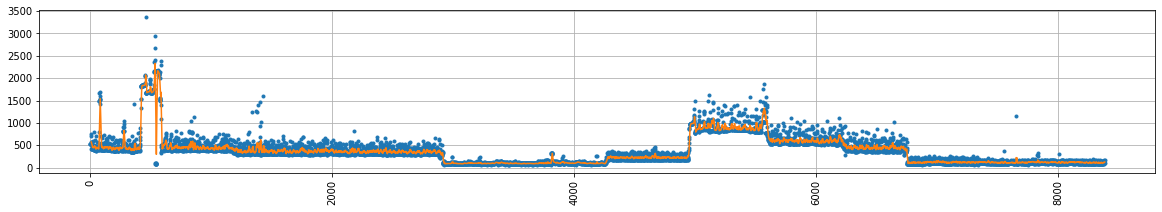

In [132]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')


plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

In [134]:
jf.groupby([jf['date'].dt.hour]).Latency.sum()

date
18    3117106
Name: Latency, dtype: int64

In [136]:
jf.groupby([jf['date'].dt.minute]).Latency.sum()

date
53     130967
54    1505285
55    1480854
Name: Latency, dtype: int64

In [139]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
18    53      490.513109
      54      343.593928
      55      396.162119
Name: Latency, dtype: float64

In [147]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

47

In [151]:
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [159]:
md = jf.groupby([jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [170]:
md

date  date
53    47       515.400000
      48       453.565217
      49       457.608696
      50      1048.055556
      52       473.772727
                 ...     
55    53       119.200000
      54       120.388235
      55       114.218391
      56       110.616279
      57       125.909091
Name: Latency, Length: 130, dtype: float64

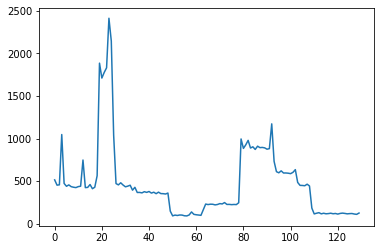

In [200]:
plt.plot(md.values)

In [247]:
# Másodperces

tt = []
tp = []
m = 53
s = 47
x = True
while x == True:
    tt.append([m, s])
    tp.append('2023-05-17 18:' + str(m) + ':' + str(s))
    s += 1
    if s > 59:
        s = 0
        m += 1
    if(m == 55 and s == 57):
        x = False

tp = pd.DataFrame(tp, columns=['date'])
tp.head()

tp = pd.to_datetime(tp['date'])
tp.head()

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-17 18:53:47,515.400000
1,2023-05-17 18:53:48,453.565217
2,2023-05-17 18:53:49,457.608696
3,2023-05-17 18:53:50,1048.055556
4,2023-05-17 18:53:51,473.772727


In [303]:
jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,ma10rt,faszom,date,_x,minute,second,sec
0,1684349627142,524,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-9,text,True,NaN,337,...,7,500,100,NaN,2023-05-17 18:53:47.142,2023-05-17 18:53:47.142,0,53,47,4
1,1684349627135,531,HTTP Request,200,NaN,jp@gc - Ultimate Thread Group 1-5,text,True,NaN,337,...,4,500,100,NaN,2023-05-17 18:53:47.135,2023-05-17 18:53:47.135,1,53,47,4


In [310]:
tmp = jf.copy()

tz = []
for s in jf['date'].dt.second:
    v = 0 if len(str(s)) == 1 else int(str(s)[0])
    tz.append(v)

    # by the way már rég meg van csinálnva a hogy a sec meg legyen ()
    
jf['sec2'] = tz

jf.loc[~(jf['sec'] == jf['sec2'])]

    # mindehol stimmel a két megoldás (minden sorban)

mz = jf.groupby([tmp['date'].dt.minute, tmp['sec']]).Latency.mean()

mz

date  sec
53    4      473.712121
      5      496.029851
54    0      939.445887
      1      651.537671
      2      384.303589
      3      290.945065
      4      103.803797
      5      196.251462
55    0      472.328976
      1      899.490783
      2      650.596026
      3      377.642424
      4      120.352010
      5      118.238655
Name: Latency, dtype: float64

In [317]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []
m = 53
s = 47
x = True
c = 0
while x == True:
    if c == 0:
        c += 1
        tt.append([m, s])
        tz.append('2023-05-17 18:' + str(m) + ':' + str(s))    
    if s % 10 == 0:
        tt.append([m, s])
        tz.append('2023-05-17 18:' + str(m) + ':' + str(s))
    s += 1
    if s > 59:
        s = 0
        m += 1
    if(m == 55 and s == 57):
        x = False

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

,date,md
0,2023-05-17 18:53:47,473.712121
1,2023-05-17 18:53:50,496.029851
2,2023-05-17 18:54:00,939.445887
3,2023-05-17 18:54:10,651.537671
4,2023-05-17 18:54:20,384.303589


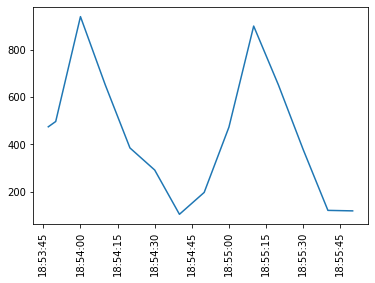

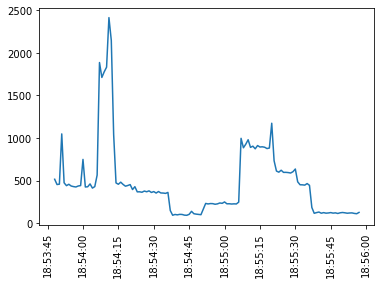

In [318]:
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [319]:
tp['date'][0]

Timestamp('2023-05-17 18:53:48')

In [322]:
tz['date'][0]

Timestamp('2023-05-17 18:53:48')

In [268]:
from datetime import datetime, timedelta

In [321]:
tz['date'] = tz['date'] + timedelta(seconds=1)

In [273]:
tp['date'] = tp['date'] + timedelta(seconds=1)

In [323]:
jf['date'][0]

Timestamp('2023-05-17 18:53:47.142000')

In [277]:
# ami eddig volt az a másodperces

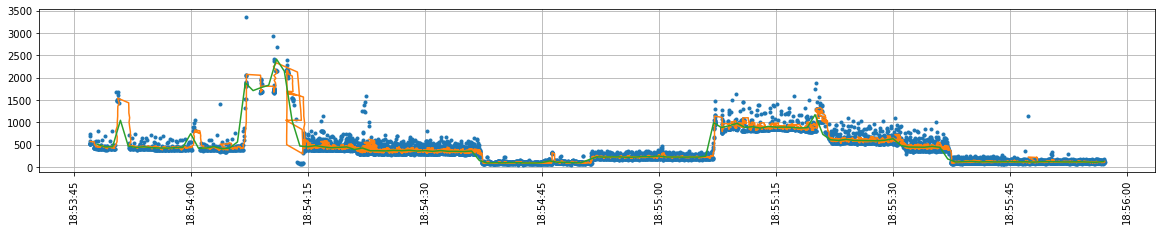

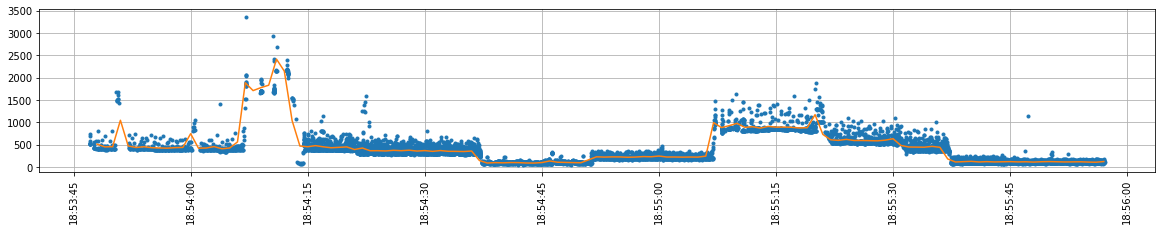

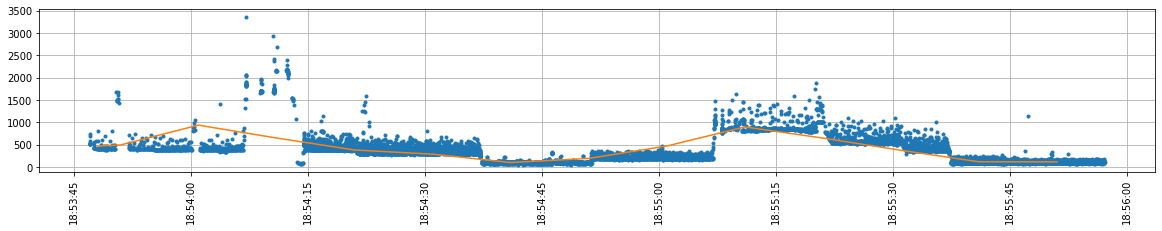

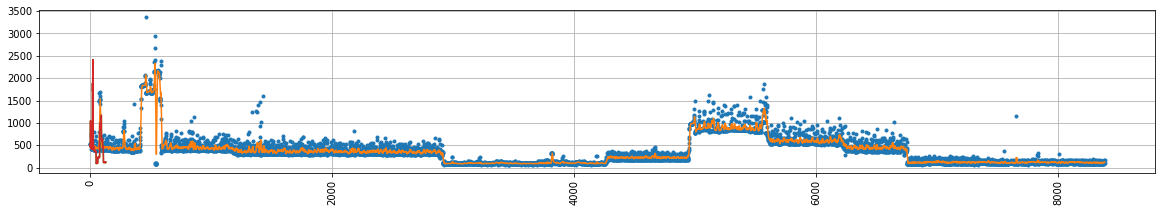

In [325]:
# Idő alapú
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.plot(md.values)
plt.plot(tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

In [ ]:
def jmf():
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(jf['Latency'], color = 'C0')
    
    ax1.plot(jf['ma10rt'], color = 'C1', lw = 2.5)
    
    ax1.plot(jf['RT_LIMIT_LOWER'], color = 'black', lw = 2.5, ls = '--')
    ax1.plot(jf['RT_LIMIT_UPPER'], color = 'black', lw = 2.5, ls = '--')
    

    ax2 = ax1.twinx()

    ax2.plot(jf['allThreads'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

jmf()

In [228]:
from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)


<class 'datetime.datetime'>
2023-05-17 13:55:26
